In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Student_Result.csv')

In [3]:
df.shape

(30641, 15)

In [4]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
df.tail()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93
30640,960,male,group B,some college,standard,none,married,never,no,1.0,school_bus,5 - 10,64,60,58


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [9]:
pd.isnull(df).sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [10]:
df.dropna(inplace =True)

In [11]:
pd.isnull(df).sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [12]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

## Gender

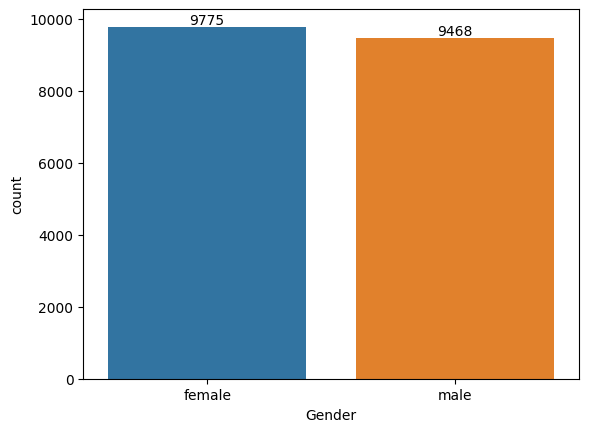

In [13]:
ax=sns.countplot(x ='Gender', data =df)

for bars in ax.containers:
    ax.bar_label(bars)

***From the above graphy we can see that the number of females in the data is more than the number of male***

## Parent Education

In [14]:
parenteduc_gb=df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(parenteduc_gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.541478     71.317685     70.551080
bachelor's degree   70.724379     73.560401     73.873964
high school         64.294461     67.284124     65.495892
master's degree     72.293680     75.922677     76.423792
some college        66.578305     69.300113     68.651525
some high school    62.522417     65.438218     63.572171


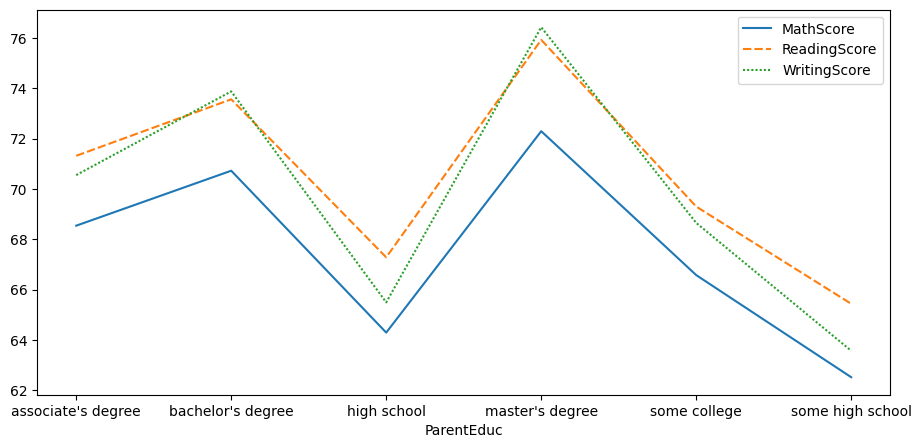

In [15]:
plt.figure(figsize=(11,5))
sns.lineplot(parenteduc_gb)
plt.show()

***from the above graph we can see that the education of the parent have a good impact on their score***

## Gender Based Score

In [16]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [17]:
score_gb=df.groupby('Gender').agg({'MathScore':['min','mean','median'],'ReadingScore':['min','mean','median'],'WritingScore':['min','mean','median']})
print(score_gb)

       MathScore                   ReadingScore                    \
             min       mean median          min       mean median   
Gender                                                              
female         0  64.256164   64.0           16  73.068338   73.0   
male           7  69.091994   69.0           10  65.885720   66.0   

       WritingScore                    
                min       mean median  
Gender                                 
female           10  73.070588   73.0  
male              4  63.990283   64.0  


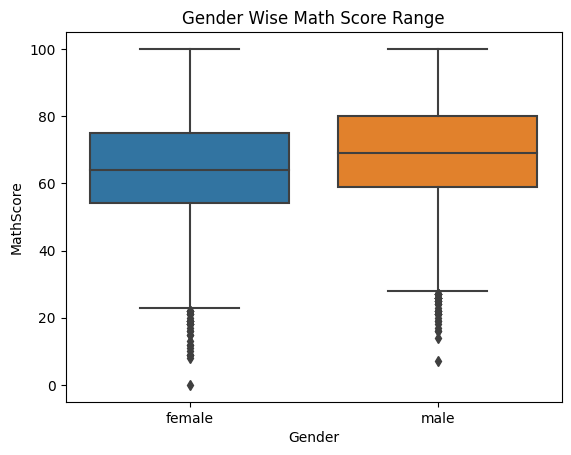

In [18]:
sns.boxplot(data=df, x='Gender', y='MathScore')
plt.title('Gender Wise Math Score Range')
plt.show()

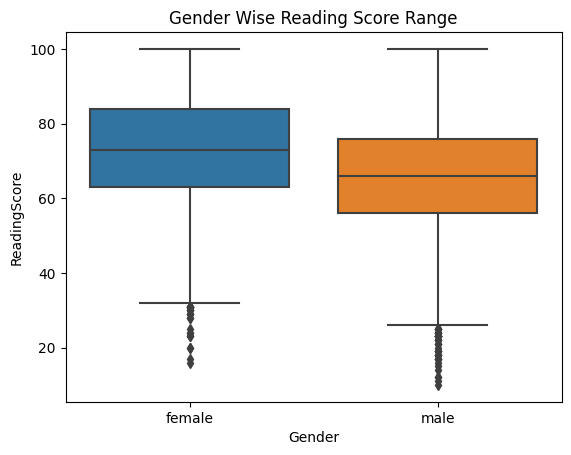

In [19]:
sns.boxplot(data=df, x='Gender', y='ReadingScore')
plt.title('Gender Wise Reading Score Range')
plt.show()

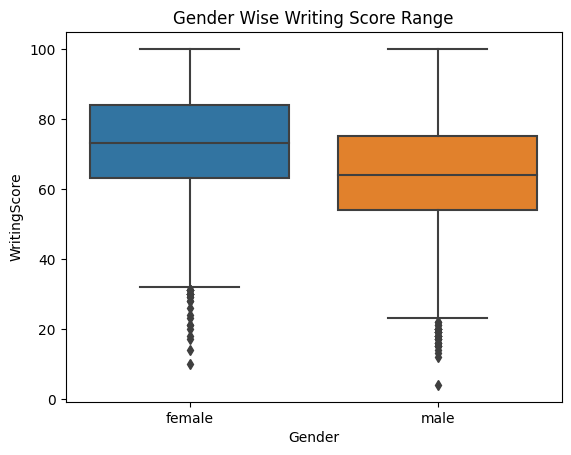

In [20]:
sns.boxplot(data=df, x='Gender', y='WritingScore')
plt.title('Gender Wise Writing Score Range')
plt.show()

***From above the graph 'MathScore','ReadingScore' and 'WritingScore' we can see that the females tend to have better performance on reading and writing testing scores than males. However, males tend to have better scores on math than females.***


## Ethnic Group Distribution

In [21]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

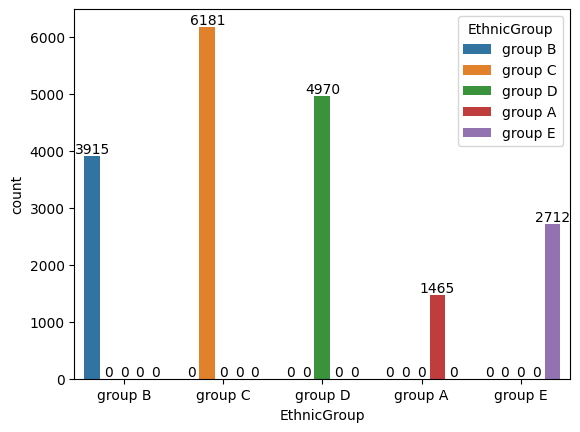

In [22]:
ax=sns.countplot(x='EthnicGroup', data=df, hue='EthnicGroup')

for bars in ax.containers:
    ax.bar_label(bars)

***from the above graph we can see that the group C value are grater than all group***

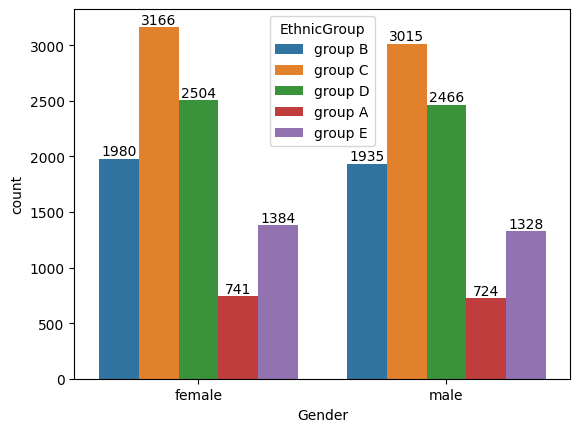

In [23]:
ax=sns.countplot(x='Gender', data=df, hue='EthnicGroup')

for bars in ax.containers:
    ax.bar_label(bars)

***from the above graph we can see that the female counting group C grater than male counting group C***

## Find Out Percentage and Grade

In [24]:
df['Percentage']=((df['MathScore']+df['ReadingScore']+df['WritingScore'])/300)*100

In [25]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Percentage
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.333333
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79,78.666667
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89,89.000000
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39,41.000000


In [26]:
def grade(x):
    if x>=90.0:
        return "A"
    elif x>=80.0 and x<90.0:
        return "B"
    elif x>=70.0 and x<80.0:
        return "C"
    elif x>=60.0 and x<70.0:
        return "D"
    elif x>=50.0 and x<60.0:
        return "E"
    elif x>=40.0 and x<50.0:
        return "F"
    elif x>=30.0 and x<40.0:
        return "G"
    else:
        return "Fail"

In [27]:
df['Grade_Math']=df['MathScore'].apply(grade)

In [28]:
df['Grade_Reading']=df['ReadingScore'].apply(grade)

In [29]:
df['Grade_Writing']=df['WritingScore'].apply(grade)

In [30]:
df['Grade']=df['Percentage'].apply(grade)

In [31]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Percentage,Grade_Math,Grade_Reading,Grade_Writing,Grade
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.333333,B,A,A,A
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.333333,C,C,C,C
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79,78.666667,C,B,C,C
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89,89.000000,B,A,B,B
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39,41.000000,F,F,G,F


## Female Vs Male Grade in Math Score

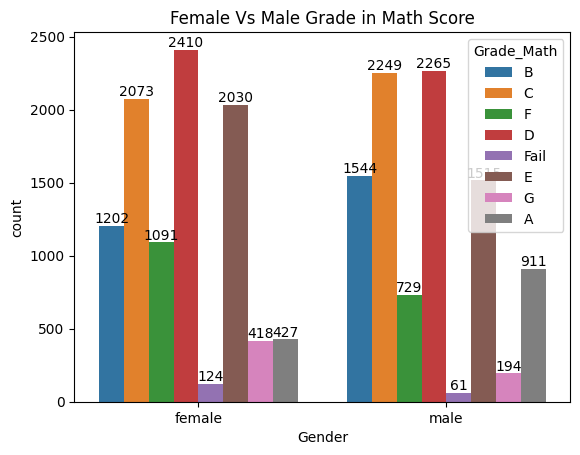

In [32]:
ax=sns.countplot(x='Gender', data=df, hue='Grade_Math')
plt.title('Female Vs Male Grade in Math Score')
for bars in ax.containers:
    ax.bar_label(bars)

## Female Vs Male Grade in Reading Score

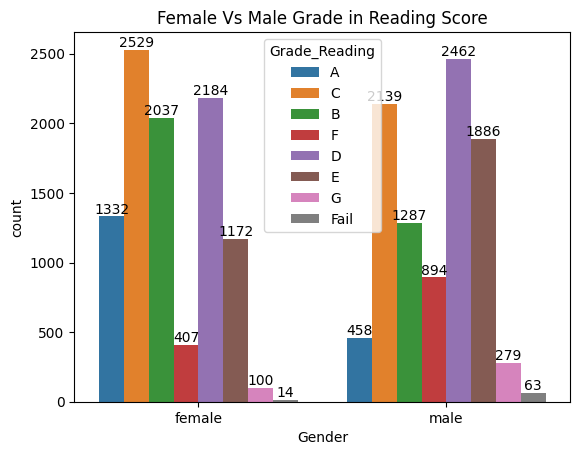

In [33]:
ax=sns.countplot(x='Gender', data=df, hue='Grade_Reading')
plt.title('Female Vs Male Grade in Reading Score')
for bars in ax.containers:
    ax.bar_label(bars)

## Female Vs Male Grade in Writing Score

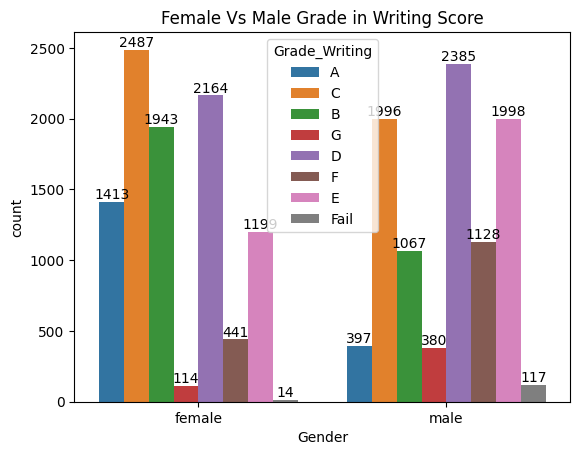

In [34]:
ax=sns.countplot(x='Gender', data=df, hue='Grade_Writing')
plt.title('Female Vs Male Grade in Writing Score')
for bars in ax.containers:
    ax.bar_label(bars)